# Clustering<br>
After supervised learning, comes a time to practice unsupervised learning as well... And that means clustering!<br>
Clustering simply means that we try to create groups, that is clusters, of our data points that have something in common, in order to help the bank or the store better target their customers with marketing campaigns for an example. But how do we do that?<br>As always, there exists an algorithm.<br><br>
<b>Steps of K-Means Clustering Algorithm</b><br>
    <ol><li>Choose the number of clusters, K</li>
        <li>Select at random K points - the centroids (which don't have to be data points)</li>
        <li>Assign each data point to the <b>closest</b> centroid</li>
    <li>Compute and place new centroid of each cluster</li>
    <li>Reassign each data point to the new closest centroid; if the change happened, go to step 4; otherwise, finish</li></ol><br>
    After this, we'll see how clustering is implemented and look at some of the problems when it comes to clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

FileNotFoundError: [Errno 2] File b'data/Mall_Customers.csv' does not exist: b'data/Mall_Customers.csv'

Intro to data: the local mall has a program in which regular customers can sign up for membership cards and we can see that they give information like gender, age and annual income to get the card. The mall, based on their spending, creates a spending score. We are hired as machine learning experts to segment their customers and help the mall to better target their customers.<br>
But here's the first question: how many clusters do we need?<br><br>
<b>The Elbow method</b> is used to help us decide how many clusters we should have. It works using a function that calculates WCSS score on every specified number of clusters.<br><br>
$$ WCSS = \sum_{Pi\ in\ C1} distance(Pi, C1)^2 + \sum_{Pi\ in\ C2} distance(Pi, C2)^2 + ... + \sum_{Pi\ in\ CK} distance(Pi, CK)^2 $$<br>
We are going to plot the Elbow Curve and see from the plot the ideal number of clusters for our segmentation problem.

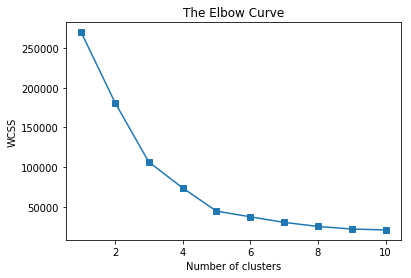

In [11]:
X = df.iloc[:, [3, 4]].values

from sklearn.cluster import KMeans

wcss = []

# counting wcss for 1 up to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='s')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Curve')
plt.show()

From the above plot, we can see that from 1 to 5 the WCSS value is falling fast, but after that, from 5 to 10, the fall is slower. That gives us the impression that 5 clusters should be ideal for our purpose.<br>
Now that we know that K should be 5, we need to use the fit_predict method to predict the clusters each of the customers belong to and plot that.

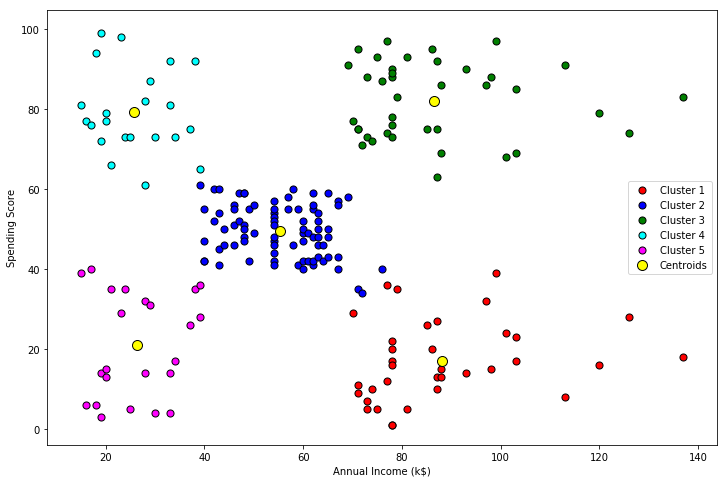

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(12, 8))
# Careful Customers
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1', edgecolors='black') 
# Average Customers
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2', edgecolors='black') 
# Target Customers
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3', edgecolors='black') 
# Careless Customers
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4', edgecolors='black') 
# Sensible Customers
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5', edgecolors='black') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

As you can see, this is only a simple demonstration of the clustering problem. We are only using 2 variables, which in turn makes it easier to plot our clusters on the 2D plot, but if there are more features which we need to include, it becomes trickier. We could use methods like PCA to lower the number of features back to two, but sometimes that doesn't pay and we need other ways of achieving this goal. For example, we can use the t-SNE algorithm to lower dimensions of our dataset, but at the cost of understanding each of the consumer clusters. From the plot below, we can't tell which cluster is one where customers earn and spend a lot, and which one is the one where customers earn and spend little.

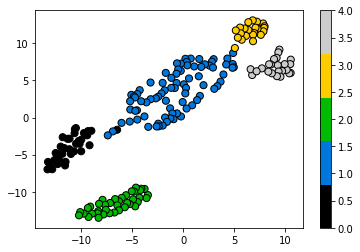

In [31]:
from sklearn.manifold import TSNE

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

tsne = TSNE(random_state=0)
X_tsne = tsne.fit_transform(df)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, s=50, edgecolors='black', cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.colorbar()
plt.show()

## Hierarchical Clustering<br>
This is another form of clustering, which is most famous for using the dendrogram plots. Hierarchical clustering can be divided into:<br>
<ol><li>Agglomerative</li><li>Divisive</li></ol><br>
The main difference between the two is the following: they both perform the same steps, only in different directions.<br><br>
<b>Steps of Agglomerative Clustering Algorithm</b>
<ol><li>Make each data point a single cluster</li>
    <li>Take two closest data points and make them one cluster</li>
    <li>Take two <b>closest clusters</b> and make them one cluster</li>
    <li>Repeat step 3, until every data point is in the same cluster</li></ol>
"Closest clusters" is in bold because there are several means of calculating the distance between them, and each one can make an impact on the final result. For example, we can calculate the distance between centroids, or between two closest, or even furthest, data points in two clusters.<br>
Calculating the average distance between all data points in two clusters is usually the ideal choice. Why? Because it's the most efficient choice when it comes to computation time. We are using the same distances we calculated once over and over again, instead of calculating new distances in every step of the algorithm.

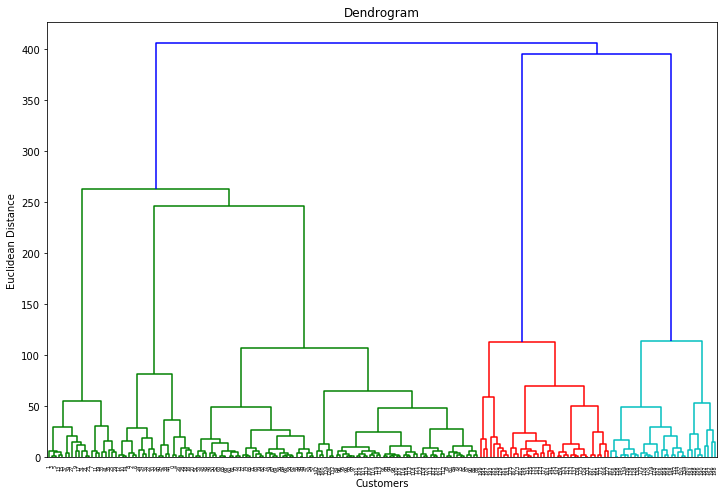

In [36]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.show()

Each line in the bottom represents one client or one cluster at the beginning of the algorithm. As the next steps start, we can see that some of the lines start connecting and thus they form clusters. In the end, everything is connected, and if we remember the last step of the algorithm, every data point is gathered into one big cluster.<br><br>
Great, but how do we choose the number of clusters now?<br>
We do that by "drawing" an imaginary line that separates the dendrogram somewhere at the point where there's the biggest euclidean distance between two clusters. BUT, every connection has to be "drawn" horizontally, and THEN we look at the biggest distance between two connections or a connection and that imaginary horizontal line. After we've found our separation line, we count the lines it crosses and that is the number of clusters.<br>
In this case, that number is 5, and the line is drawn somewhere in the range of 130 to 220 Euclidean Distance.

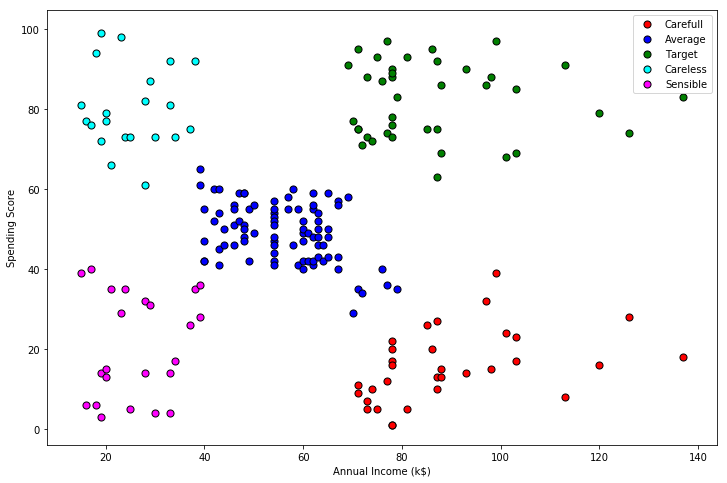

In [38]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(12, 8))
# Careful Customers
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Carefull', edgecolors='black') 
# Average Customers
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Average', edgecolors='black') 
# Target Customers
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Target', edgecolors='black') 
# Careless Customers
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label='Careless', edgecolors='black') 
# Sensible Customers
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label='Sensible', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

As can be seen by looking at the plots of K-Means and Agglomerative clustering, there are some slight differences, mostly resulting in Average cluster getting more customers.

## Evaluation of Clustering Algorithms<br>
All that is good and fine, but how do we know if our clustering algorithm is good or bad, or which one that we used is better than the other? The trickiness is in that we don't have any labels that we can use to calculate the goodness of clustering. But nonetheless, there are some metrics we could use.<br>
But first, there are two types of clustering metrics: internal and external.<br>
External metrics use known split, which means that we know beforehand how to split our data into clusters and then we compare the two.<br>
Internal metrics don't use any labels and use only the data we had at the start. This is probably the more common case, so we'll focus only on the internal metrics.<br><br>
<b>Silhouette</b> is an internal metric which uses only the initially given data and our result of clustering. The formula is the following:<br>
$$ s = \frac {b-a}{max(a,b)} $$
where:<br>
a - mean distance between one data point and other data points in the same cluster<br>
b - mean distance between one data point and a data point from the nearest cluster<br><br>
Silhouette score is in the range $[-1,\ 1]$, meaning that 1 is a good clustering result, and -1 a bad one.<br>
Try to answer for yourself, when will the score be -1 and when will it be 1?

In [48]:
from sklearn.metrics import silhouette_score

print(f'Silhouette score for Agglomerative Clustering algorithm is: {silhouette_score(X, hc.labels_)}')
print(f'Silhouette score for K-Means Clustering algorithm is: {silhouette_score(X, kmeans.labels_)}')

Silhouette score for Agglomerative Clustering algorithm is: 0.5529945955148897
Silhouette score for K-Means Clustering algorithm is: 0.553931997444648


We can see that there's almost no difference between the two algorithms we used and that both of them are relatively good.